# Exploratory Data Analysis with Chemistry Datasets

**DOST-ITDI AI Training Workshop**  
**Day 1 - Session 2: Google Colab and Exploratory Data Analysis**

---

## Learning Objectives
1. Work with real chemistry datasets
2. Perform exploratory data analysis (EDA)
3. Visualize molecular properties
4. Handle chemical structures using RDKit
5. Prepare data for machine learning

## 1. Setup and Installation

First, let's install the necessary chemistry libraries

In [ ]:
# Install RDKit (chemistry library)
!pip install rdkit -q
!pip install seaborn -q

print("✓ Installation complete!")

    python-dateutil (>=2.5.0requests)
                    ~~~~~~~~~^

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


✓ Installation complete!


    python-dateutil (>=2.5.0requests)
                    ~~~~~~~~~^

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, AllChem
from rdkit.Chem.Draw import IPythonConsole
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 2. Loading Chemistry Datasets

We'll use the ESOL (Estimated SOLubility) dataset - a classic chemistry dataset containing aqueous solubility data for organic compounds.

In [ ]:
# Load ESOL dataset
url = "https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv"
df = pd.read_csv(url)

print(f"Dataset shape: {df.shape[0]} molecules, {df.shape[1]} columns")
print("\nFirst few rows:")
df.head()

Dataset shape: 1128 molecules, 10 columns

First few rows:


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [ ]:
# Check column names and data types
print("Column Information:")
print(df.info())

print("\nColumn descriptions:")
print("- Compound ID: Compound identifier")
print("- ESOL predicted log solubility: Predicted solubility")
print("- Minimum Degree: Minimum degree of atoms")
print("- Molecular Weight: Molecular weight (g/mol)")
print("- Number of H-Bond Donors: Hydrogen bond donors")
print("- Number of Rings: Number of rings in structure")
print("- Number of Rotatable Bonds: Rotatable bonds")
print("- Polar Surface Area: Topological polar surface area")
print("- measured log solubility: Experimental solubility")
print("- smiles: SMILES notation of molecule")

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Compound ID                                      1128 non-null   object 
 1   ESOL predicted log solubility in mols per litre  1128 non-null   float64
 2   Minimum Degree                                   1128 non-null   int64  
 3   Molecular Weight                                 1128 non-null   float64
 4   Number of H-Bond Donors                          1128 non-null   int64  
 5   Number of Rings                                  1128 non-null   int64  
 6   Number of Rotatable Bonds                        1128 non-null   int64  
 7   Polar Surface Area                               1128 non-null   float64
 8   measured log solubility in mols per litre        1128 non-null   float64
 9   smiles    

## 3. Data Exploration

### 3.1 Basic Statistics

In [ ]:
# Statistical summary
df.describe()

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,-2.988192,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,1.683220,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,-9.702000,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,-3.948250,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,-2.870000,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,-1.843750,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,1.091000,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage missing: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

Missing values per column:
Compound ID                                        0
ESOL predicted log solubility in mols per litre    0
Minimum Degree                                     0
Molecular Weight                                   0
Number of H-Bond Donors                            0
Number of Rings                                    0
Number of Rotatable Bonds                          0
Polar Surface Area                                 0
measured log solubility in mols per litre          0
smiles                                             0
dtype: int64

Total missing values: 0
Percentage missing: 0.00%


In [ ]:
# Check for duplicate SMILES
duplicates = df['smiles'].duplicated().sum()
print(f"Number of duplicate molecules: {duplicates}")

if duplicates > 0:
    print("\nDuplicate SMILES:")
    print(df[df['smiles'].duplicated(keep=False)].sort_values('smiles'))

Number of duplicate molecules: 0


### 3.2 Distribution of Molecular Properties

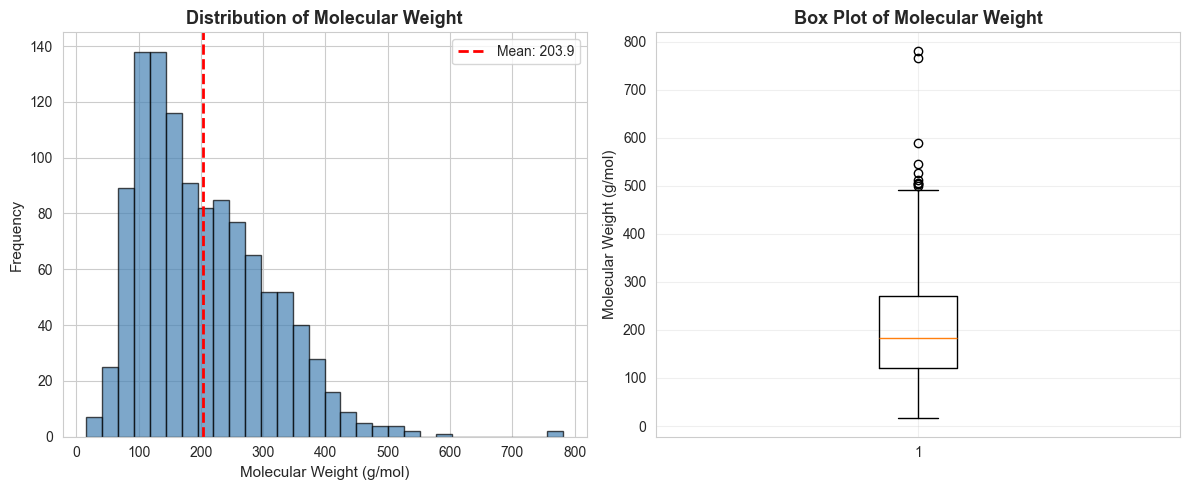

Mean MW: 203.94 g/mol
Median MW: 182.18 g/mol
Std Dev: 102.74 g/mol


In [ ]:
# Distribution of Molecular Weight
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Molecular Weight'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Molecular Weight (g/mol)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Distribution of Molecular Weight', fontsize=13, fontweight='bold')
plt.axvline(df['Molecular Weight'].mean(), color='red', linestyle='--',
            linewidth=2, label=f"Mean: {df['Molecular Weight'].mean():.1f}")
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df['Molecular Weight'], vert=True)
plt.ylabel('Molecular Weight (g/mol)', fontsize=11)
plt.title('Box Plot of Molecular Weight', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean MW: {df['Molecular Weight'].mean():.2f} g/mol")
print(f"Median MW: {df['Molecular Weight'].median():.2f} g/mol")
print(f"Std Dev: {df['Molecular Weight'].std():.2f} g/mol")

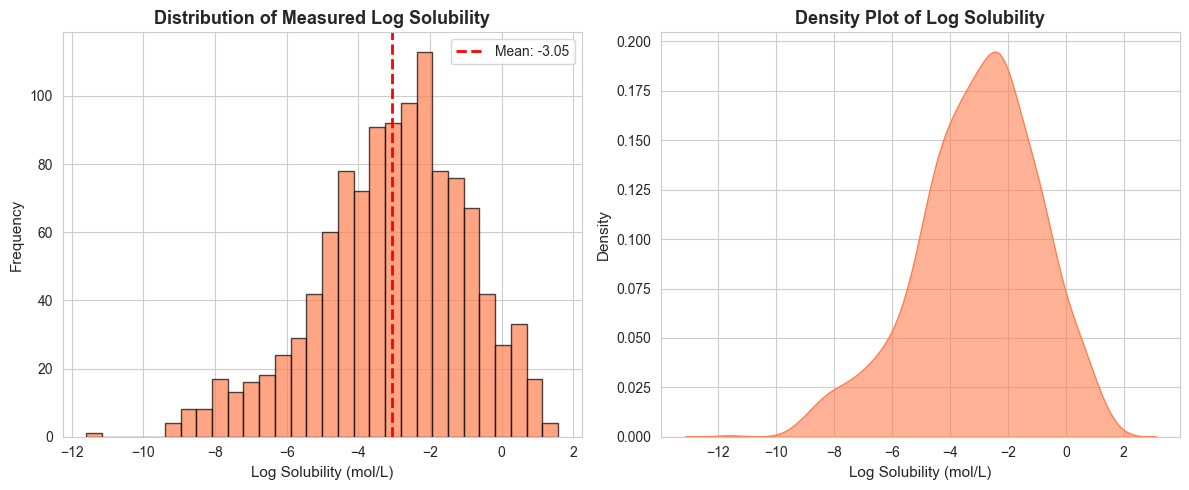

In [ ]:
# Distribution of Log Solubility
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['measured log solubility in mols per litre'], bins=30,
         edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('Log Solubility (mol/L)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Distribution of Measured Log Solubility', fontsize=13, fontweight='bold')
plt.axvline(df['measured log solubility in mols per litre'].mean(),
            color='red', linestyle='--', linewidth=2,
            label=f"Mean: {df['measured log solubility in mols per litre'].mean():.2f}")
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(data=df['measured log solubility in mols per litre'],
            fill=True, color='coral', alpha=0.6)
plt.xlabel('Log Solubility (mol/L)', fontsize=11)
plt.ylabel('Density', fontsize=11)
plt.title('Density Plot of Log Solubility', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

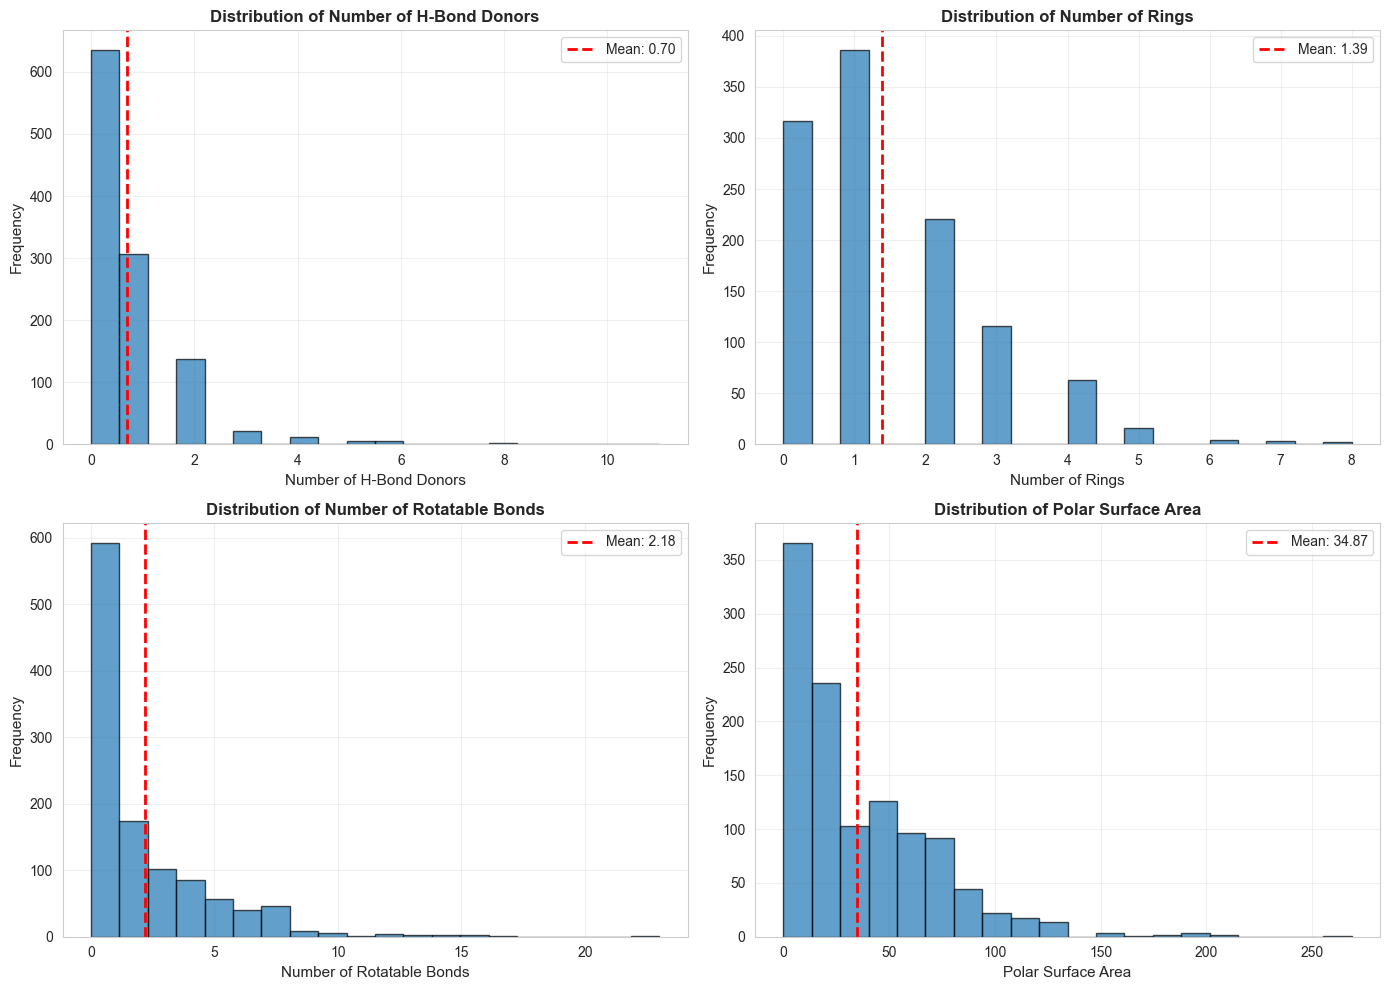

In [ ]:
# Distribution of multiple properties
properties = ['Number of H-Bond Donors', 'Number of Rings',
              'Number of Rotatable Bonds', 'Polar Surface Area']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, prop in enumerate(properties):
    axes[idx].hist(df[prop], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(prop, fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Distribution of {prop}', fontsize=12, fontweight='bold')
    axes[idx].axvline(df[prop].mean(), color='red', linestyle='--',
                     linewidth=2, label=f"Mean: {df[prop].mean():.2f}")
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Correlation Analysis

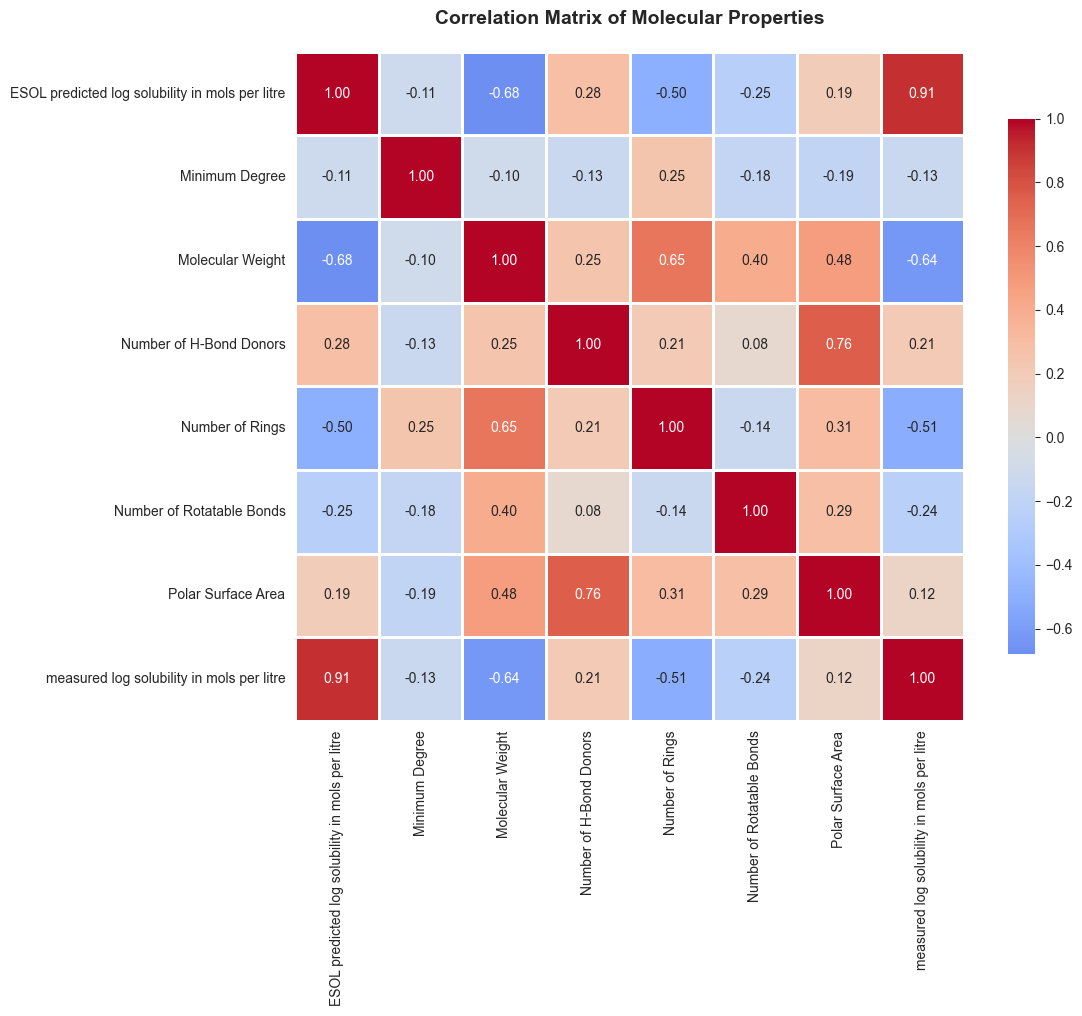

In [ ]:
# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Molecular Properties', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Correlations with Measured Log Solubility:
measured log solubility in mols per litre          1.000000
ESOL predicted log solubility in mols per litre    0.907264
Number of H-Bond Donors                            0.209429
Polar Surface Area                                 0.123210
Minimum Degree                                    -0.130445
Number of Rotatable Bonds                         -0.244256
Number of Rings                                   -0.512279
Molecular Weight                                  -0.640189
Name: measured log solubility in mols per litre, dtype: float64


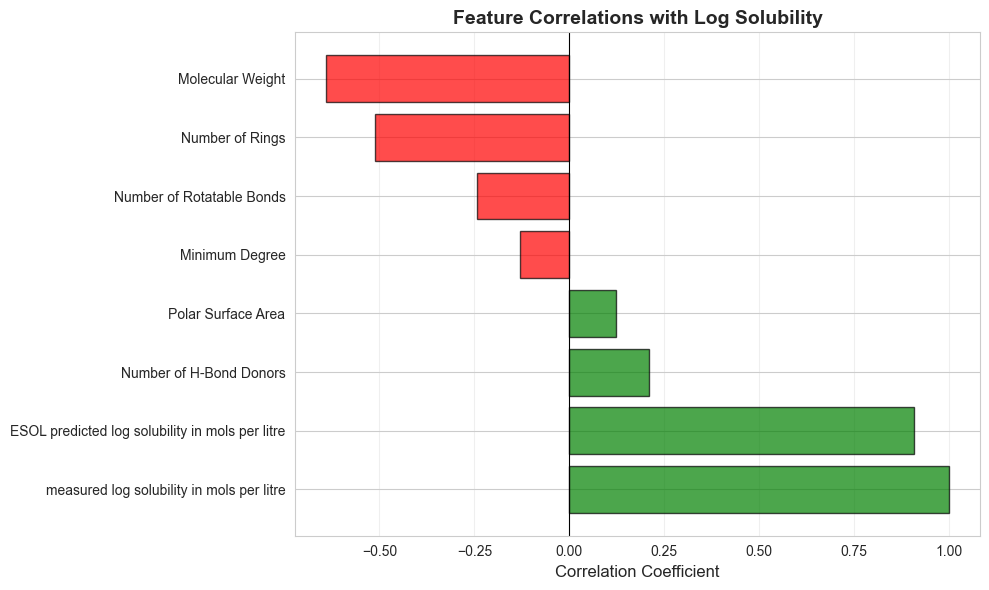

In [ ]:
# Find strongest correlations with solubility
solubility_corr = correlation_matrix['measured log solubility in mols per litre'].sort_values(ascending=False)
print("Correlations with Measured Log Solubility:")
print(solubility_corr)

# Visualize
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in solubility_corr.values]
plt.barh(solubility_corr.index, solubility_corr.values, color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.title('Feature Correlations with Log Solubility', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### 3.4 Scatter Plots - Relationships Between Variables

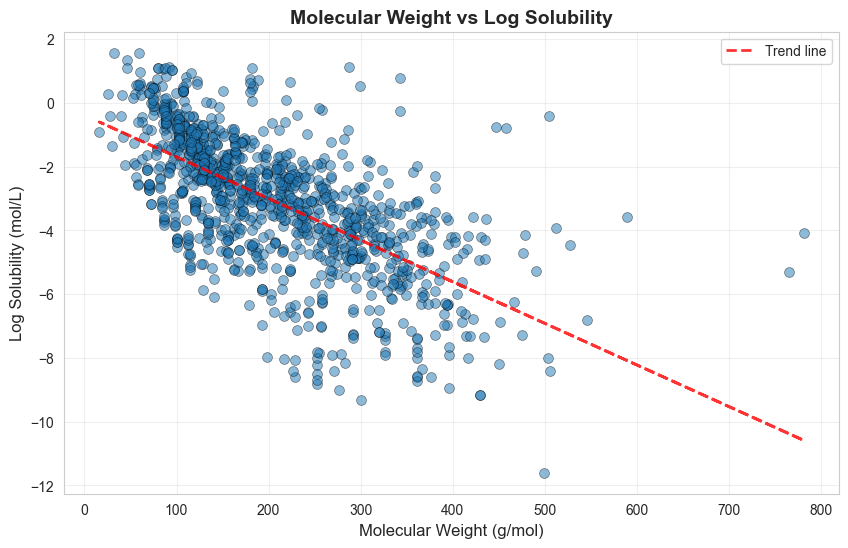

Correlation: -0.6402


In [ ]:
# Molecular Weight vs Solubility
plt.figure(figsize=(10, 6))
plt.scatter(df['Molecular Weight'], df['measured log solubility in mols per litre'],
            alpha=0.5, s=50, edgecolors='black', linewidth=0.5)
plt.xlabel('Molecular Weight (g/mol)', fontsize=12)
plt.ylabel('Log Solubility (mol/L)', fontsize=12)
plt.title('Molecular Weight vs Log Solubility', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['Molecular Weight'], df['measured log solubility in mols per litre'], 1)
p = np.poly1d(z)
plt.plot(df['Molecular Weight'], p(df['Molecular Weight']),
         "r--", linewidth=2, label='Trend line', alpha=0.8)
plt.legend()
plt.show()

corr = df['Molecular Weight'].corr(df['measured log solubility in mols per litre'])
print(f"Correlation: {corr:.4f}")

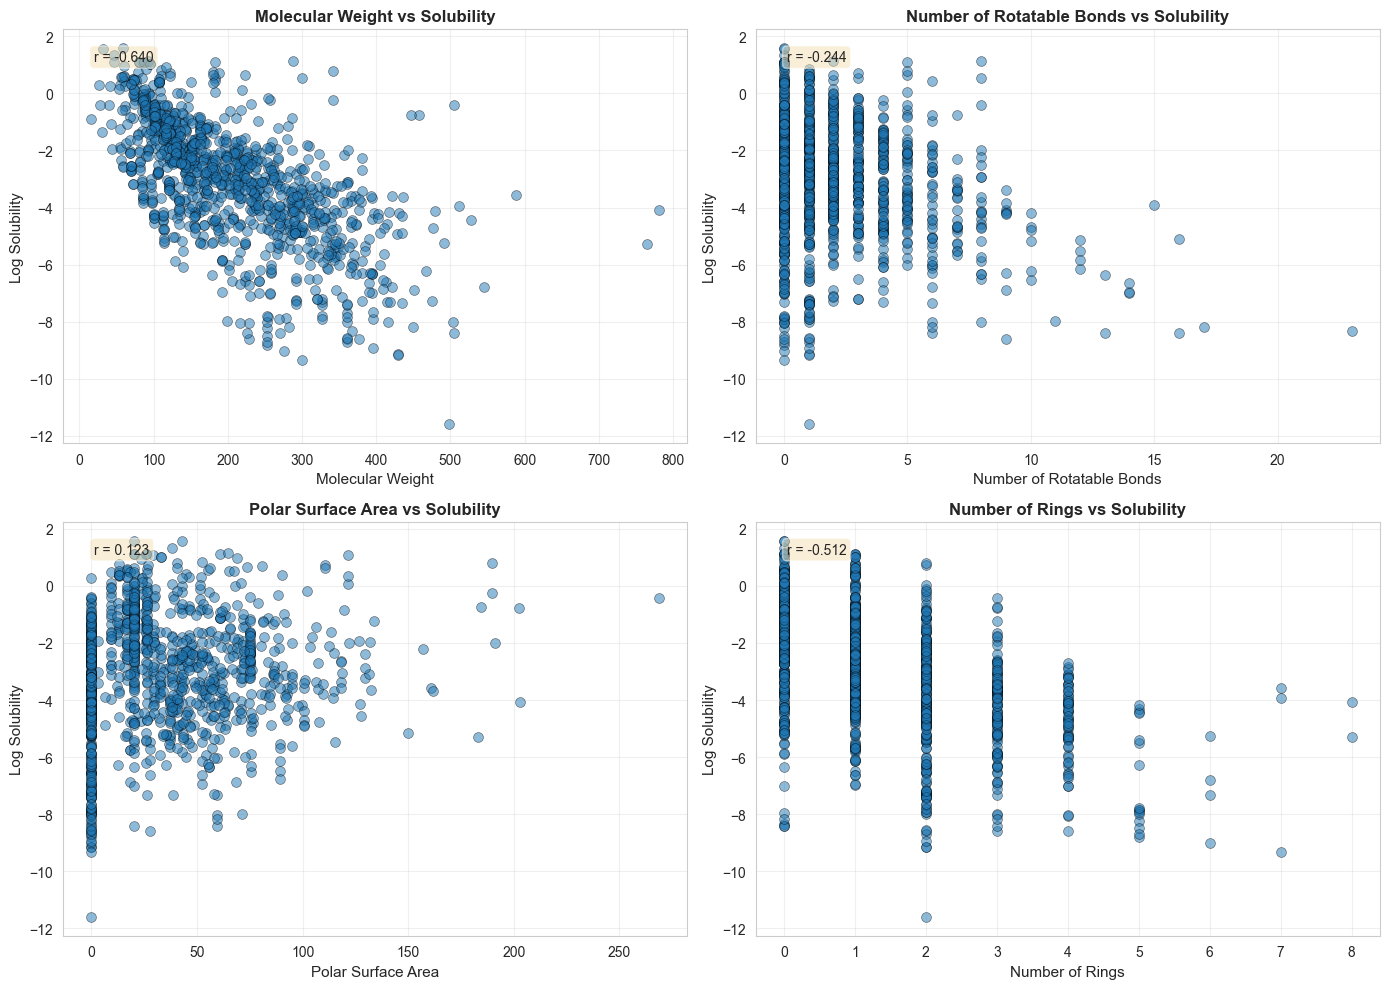

In [ ]:
# Multiple scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

features = ['Molecular Weight', 'Number of Rotatable Bonds',
            'Polar Surface Area', 'Number of Rings']

for idx, feature in enumerate(features):
    axes[idx].scatter(df[feature], df['measured log solubility in mols per litre'],
                     alpha=0.5, s=50, edgecolors='black', linewidth=0.5)
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Log Solubility', fontsize=11)
    axes[idx].set_title(f'{feature} vs Solubility', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    # Add correlation
    corr = df[feature].corr(df['measured log solubility in mols per litre'])
    axes[idx].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[idx].transAxes,
                  fontsize=10, verticalalignment='top',
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## 4. Working with Molecular Structures (RDKit)

### 4.1 SMILES to Molecule Objects

In [ ]:
# Convert SMILES to molecule objects
df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)

# Check for invalid SMILES
invalid = df['mol'].isna().sum()
print(f"Invalid SMILES: {invalid}")

# Remove invalid molecules
df_clean = df[df['mol'].notna()].copy()
print(f"\nDataset size after cleaning: {len(df_clean)} molecules")

Invalid SMILES: 0

Dataset size after cleaning: 1128 molecules


### 4.2 Visualizing Molecules

Most Soluble Molecules:


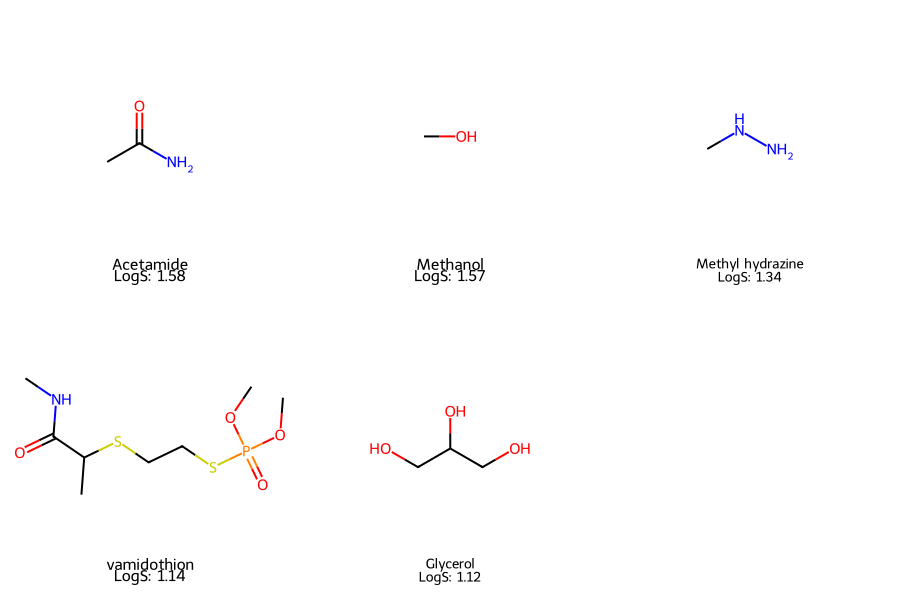

In [ ]:
# Display example molecules
print("Most Soluble Molecules:")
most_soluble = df_clean.nlargest(5, 'measured log solubility in mols per litre')
mols = [Chem.MolFromSmiles(smi) for smi in most_soluble['smiles'].values]
legends = [f"{row['Compound ID']}\nLogS: {row['measured log solubility in mols per litre']:.2f}"
           for _, row in most_soluble.iterrows()]

img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300, 300),
                           legends=legends)
display(img)

Least Soluble Molecules:


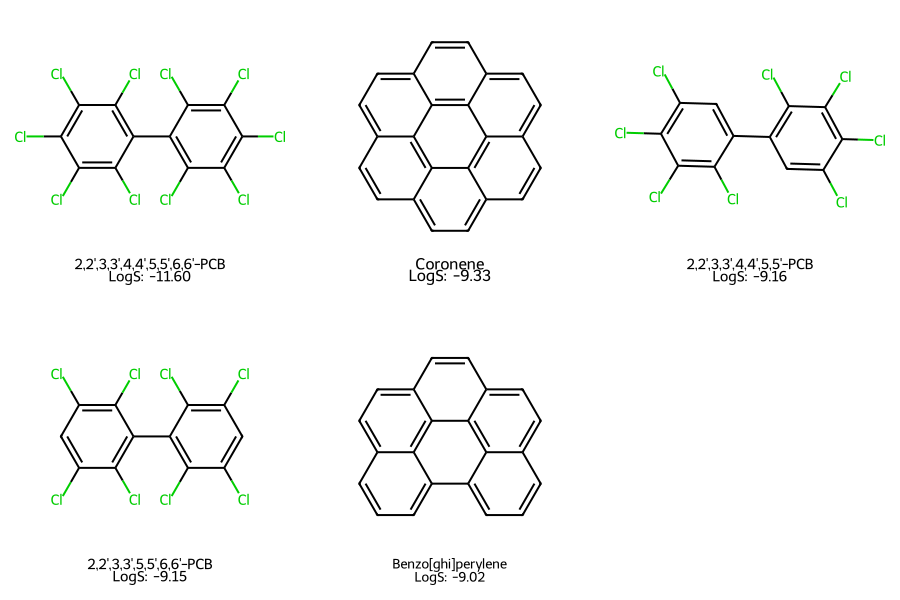

In [ ]:
# Display least soluble molecules
print("Least Soluble Molecules:")
least_soluble = df_clean.nsmallest(5, 'measured log solubility in mols per litre')
mols = [Chem.MolFromSmiles(smi) for smi in least_soluble['smiles'].values]
legends = [f"{row['Compound ID']}\nLogS: {row['measured log solubility in mols per litre']:.2f}"
           for _, row in least_soluble.iterrows()]

img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300, 300),
                           legends=legends)
display(img)

### 4.3 Computing Additional Molecular Descriptors

In [ ]:
# Calculate additional descriptors using RDKit
df_clean['LogP'] = df_clean['mol'].apply(Descriptors.MolLogP)
df_clean['NumHAcceptors'] = df_clean['mol'].apply(Descriptors.NumHAcceptors)
df_clean['NumAromaticRings'] = df_clean['mol'].apply(Descriptors.NumAromaticRings)
df_clean['FractionCsp3'] = df_clean['mol'].apply(Descriptors.FractionCsp3)
df_clean['NumAtoms'] = df_clean['mol'].apply(lambda x: x.GetNumAtoms())

print("New descriptors computed:")
print(df_clean[['Compound ID', 'LogP', 'NumHAcceptors', 'NumAromaticRings',
                'FractionCsp3', 'NumAtoms']].head(10))

AttributeError: module 'rdkit.Chem.Descriptors' has no attribute 'FractionCsp3'

In [ ]:
# LogP vs Solubility (Lipinski's Rule)
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['LogP'], df_clean['measured log solubility in mols per litre'],
            alpha=0.5, s=50, edgecolors='black', linewidth=0.5, c=df_clean['Molecular Weight'],
            cmap='viridis')
plt.colorbar(label='Molecular Weight')
plt.xlabel('LogP (Lipophilicity)', fontsize=12)
plt.ylabel('Log Solubility (mol/L)', fontsize=12)
plt.title('LogP vs Log Solubility', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

corr = df_clean['LogP'].corr(df_clean['measured log solubility in mols per litre'])
plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
plt.show()

## 5. Data Insights and Pattern Discovery

### 5.1 Lipinski's Rule of Five Analysis

In [ ]:
# Lipinski's Rule of Five for drug-likeness
# MW <= 500, LogP <= 5, HBD <= 5, HBA <= 10

df_clean['Lipinski_MW'] = df_clean['Molecular Weight'] <= 500
df_clean['Lipinski_LogP'] = df_clean['LogP'] <= 5
df_clean['Lipinski_HBD'] = df_clean['Number of H-Bond Donors'] <= 5
df_clean['Lipinski_HBA'] = df_clean['NumHAcceptors'] <= 10

# Count violations
df_clean['Lipinski_Violations'] = 4 - (
    df_clean['Lipinski_MW'].astype(int) +
    df_clean['Lipinski_LogP'].astype(int) +
    df_clean['Lipinski_HBD'].astype(int) +
    df_clean['Lipinski_HBA'].astype(int)
)

# Summary
print("Lipinski's Rule of Five Analysis:")
print(f"Total compounds: {len(df_clean)}")
print(f"\nCompliant (0 violations): {(df_clean['Lipinski_Violations'] == 0).sum()}")
print(f"1 violation: {(df_clean['Lipinski_Violations'] == 1).sum()}")
print(f"2 violations: {(df_clean['Lipinski_Violations'] == 2).sum()}")
print(f"3+ violations: {(df_clean['Lipinski_Violations'] >= 3).sum()}")

In [ ]:
# Visualize Lipinski violations
plt.figure(figsize=(10, 6))
violation_counts = df_clean['Lipinski_Violations'].value_counts().sort_index()
plt.bar(violation_counts.index, violation_counts.values,
        edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Number of Lipinski Violations', fontsize=12)
plt.ylabel('Number of Compounds', fontsize=12)
plt.title("Lipinski's Rule of Five Compliance", fontsize=14, fontweight='bold')
plt.xticks(violation_counts.index)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

### 5.2 Molecular Complexity Analysis

In [ ]:
# Categorize molecules by complexity
def categorize_complexity(row):
    if row['Number of Rings'] == 0 and row['Number of Rotatable Bonds'] <= 3:
        return 'Simple'
    elif row['Number of Rings'] <= 2 and row['Number of Rotatable Bonds'] <= 6:
        return 'Moderate'
    else:
        return 'Complex'

df_clean['Complexity'] = df_clean.apply(categorize_complexity, axis=1)

# Count and visualize
complexity_counts = df_clean['Complexity'].value_counts()
print("Molecular Complexity Distribution:")
print(complexity_counts)

plt.figure(figsize=(10, 6))
plt.pie(complexity_counts.values, labels=complexity_counts.index,
        autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightyellow', 'lightcoral'])
plt.title('Distribution of Molecular Complexity', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# Solubility by complexity
plt.figure(figsize=(10, 6))
df_clean.boxplot(column='measured log solubility in mols per litre', by='Complexity',
                 figsize=(10, 6), patch_artist=True)
plt.xlabel('Molecular Complexity', fontsize=12)
plt.ylabel('Log Solubility (mol/L)', fontsize=12)
plt.title('Log Solubility by Molecular Complexity', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove the default title
plt.grid(True, alpha=0.3)
plt.show()

# Statistical comparison
print("\nMean Solubility by Complexity:")
print(df_clean.groupby('Complexity')['measured log solubility in mols per litre'].mean().sort_values(ascending=False))

## 6. Data Preprocessing for Machine Learning

### 6.1 Feature Selection

In [ ]:
# Select features for ML
feature_columns = [
    'Molecular Weight',
    'Number of H-Bond Donors',
    'Number of Rings',
    'Number of Rotatable Bonds',
    'Polar Surface Area',
    'LogP',
    'NumHAcceptors',
    'NumAromaticRings'
]

target_column = 'measured log solubility in mols per litre'

X = df_clean[feature_columns]
y = df_clean[target_column]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures:")
print(X.head())

### 6.2 Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns, index=X.index)

print("Original data:")
print(X.describe())
print("\nScaled data:")
print(X_scaled_df.describe())

## 7. Summary and Key Findings

### Key Insights from EDA:

1. **Dataset Characteristics**:
   - Over 1,000 organic compounds with solubility data
   - Molecular weights range from small molecules to larger compounds
   - Log solubility ranges from highly soluble to insoluble compounds

2. **Important Correlations**:
   - Molecular weight shows negative correlation with solubility
   - LogP (lipophilicity) is strongly correlated with solubility
   - Polar surface area affects solubility

3. **Molecular Complexity**:
   - Most compounds are of moderate complexity
   - Simpler molecules tend to be more soluble
   - Ring structures affect solubility patterns

4. **Drug-likeness**:
   - Majority of compounds comply with Lipinski's Rule of Five
   - This suggests the dataset contains drug-like molecules

### Next Steps:
- Build machine learning models to predict solubility
- Compare different regression algorithms
- Evaluate model performance using appropriate metrics

## 8. Exercise: Explore Another Chemistry Dataset

In [ ]:
# TODO: Load and explore the FreeSolv dataset (experimental and calculated hydration free energies)
# URL: https://raw.githubusercontent.com/MobleyLab/FreeSolv/master/database.txt

# Your code here:
# 1. Load the dataset
# 2. Explore basic statistics
# 3. Create visualizations
# 4. Compute molecular descriptors
# 5. Find interesting patterns

---

## Resources

- [RDKit Documentation](https://www.rdkit.org/docs/)
- [MoleculeNet Datasets](http://moleculenet.org/datasets-1)
- [DeepChem Tutorials](https://deepchem.readthedocs.io/)
- [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

**Next Notebook: Machine Learning with Scikit-learn - Regression Models**